# Data Analysis goal

Which customer segments should Oodle invest more in marketing?

# Approach

I plan to analyse the dataset to identify trends of current users who use Oodle. 
I am going to cut this data by age, area, and car type. 

I expect to identify:
- Distribution of Oodle customers
- Number of approved applicants who do not fund their loan
- Distribution of revenue from Oodle customers 


## Import libraries 



In [1]:
#Pandas for managing datasets
import pandas as pd

In [2]:
#Matplotlib for additional customisation
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#Seaborn for data visualisation
import seaborn as sns 

## Import dataset

In [4]:
#Read the dataset
df = pd.read_csv('Original Case_Study_for_Data_Test.csv')

## First look at the dataset

In [5]:
#View the first 5 rows of the dataset
df.head()

,ID,age,car_type,Loanamount,Deposit,area,APR,application_outcome,Funded
0,9997,61,Convertible,"£24,108.00",£881.00,rural,0.15,approved,No
1,9996,42,Saloon,"£5,988.00",£967.00,rural,0.20,approved,No
2,9995,57,Saloon,"£5,099.00",£973.00,urban,0.15,approved,No
3,9994,32,Convertible,"£20,774.00","£1,478.00",rural,NaN,declined,NaN
4,9993,29,Saloon,"£4,612.00",£774.00,urban,NaN,declined,NaN


In [6]:
#View last rows of the dataset
df.tail()

,ID,age,car_type,Loanamount,Deposit,area,APR,application_outcome,Funded
9995,8876,38,Convertible,"£23,904.00","£5,998.00",urban,0.05,approved,No
9996,8179,19,Saloon,"£8,559.00","£5,999.00",rural,NaN,declined,NaN
9997,9535,52,Convertible,"£19,296.00","£5,999.00",rural,0.05,approved,No
9998,8989,35,SUV,"£12,234.00","£6,000.00",urban,0.05,approved,Yes
9999,9613,55,Saloon,"£7,475.00","£6,000.00",urban,0.15,approved,Yes


In [7]:
#Checking column data types
df.dtypes

ID                       int64
age                      int64
car_type                object
 Loanamount             object
 Deposit                object
area                    object
APR                    float64
application_outcome     object
Funded                  object
dtype: object

## Cleaning the dataset

Making the dataset consistent to be used in calculations:

In [8]:
#rename column headers for consistency
df.columns =['ID', 'Age', 'Car type', 'Loan amount', 'Deposit', 'Area', 'APR', 'Application outcome','Funded status']

In [9]:
#Replacing NaN values with 0 in both APR and Funded status columns
df['APR'] = df['APR'].fillna(0)
df['Funded status']= df['Funded status'].fillna(0)

In [10]:
#Changing Loan amount data type and removing £ and comma
df['Loan amount'] = df['Loan amount'].astype(str)
df['Loan amount'] = df['Loan amount'].str.replace(',', '').str.replace('£', '').astype(float)

#Changing deposit data type and removing £ and comma
df['Deposit'] = df['Deposit'].astype(str)
df['Deposit'] = df['Deposit'].str.replace(',', '').str.replace('£', '').astype(float)

df.head()


,ID,Age,Car type,Loan amount,Deposit,Area,APR,Application outcome,Funded status
0,9997,61,Convertible,24108.0,881.0,rural,0.15,approved,No
1,9996,42,Saloon,5988.0,967.0,rural,0.20,approved,No
2,9995,57,Saloon,5099.0,973.0,urban,0.15,approved,No
3,9994,32,Convertible,20774.0,1478.0,rural,0.00,declined,0
4,9993,29,Saloon,4612.0,774.0,urban,0.00,declined,0


## Beginning the data analysis

### 10,000 total Oodle applications have been made

In [11]:
#Total applications by counting the number of rows in the dataset
total_applications = df.shape[0]
print(total_applications)


10000


### Let's categorise these applicants by area and their funded status

In [12]:
#Categorising total applications by area and funded status
Total_applications = df.groupby(['Area','Funded status']).count()['ID']
print(Total_applications)

Area   Funded status
rural  0                2247
       No               1798
       Yes              1245
urban  0                1283
       No               1603
       Yes              1824
Name: ID, dtype: int64


### These categories can be shown on a bar chart:

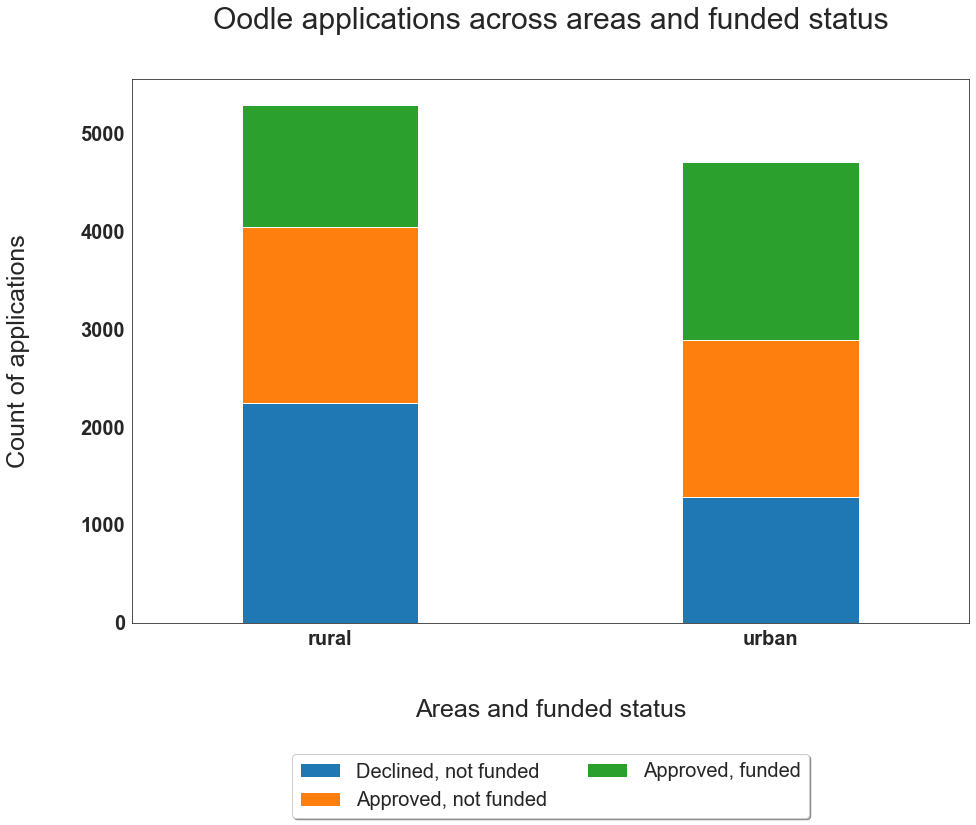

In [18]:
#Plotting the graph
df.groupby(['Area','Funded status']).count()['ID'].unstack().plot(  
    figsize=(15,10),  
    kind='bar',
    edgecolor='white',
    width=0.4,
    stacked = True)


#Graph customisation
plt.title("Oodle applications across areas and funded status", fontsize=30, pad=50)
plt.xlabel("Areas and funded status", fontsize=25, labelpad=50)
plt.xticks(fontsize=20, rotation = 360, fontweight='bold')
plt.ylabel("Count of applications", fontsize=25, labelpad=50)
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(['Declined, not funded','Approved, not funded','Approved, funded'], 
           loc='center', 
           bbox_to_anchor=(0.5,-0.3), 
           ncol=2, 
           shadow=True, 
           fontsize=20)


#Show plot
plt.show()


From the bar chart, we can see that:

- More applications in total were made by rural applicants but more rural applicants were declined
- Urban areas had more fully funded applicants

Recommendation

- I recommend that Oodle understands more on why more rural applicants are being declined and a much smaller proportion being funded.


### Digging deeper into the declined applications - cut by age

In the car ownership industry, I would expect there to be variation of loan approvals by age as older drivers are usually seen as safer. 

I am going to plot a bar graph to cut the data by age.


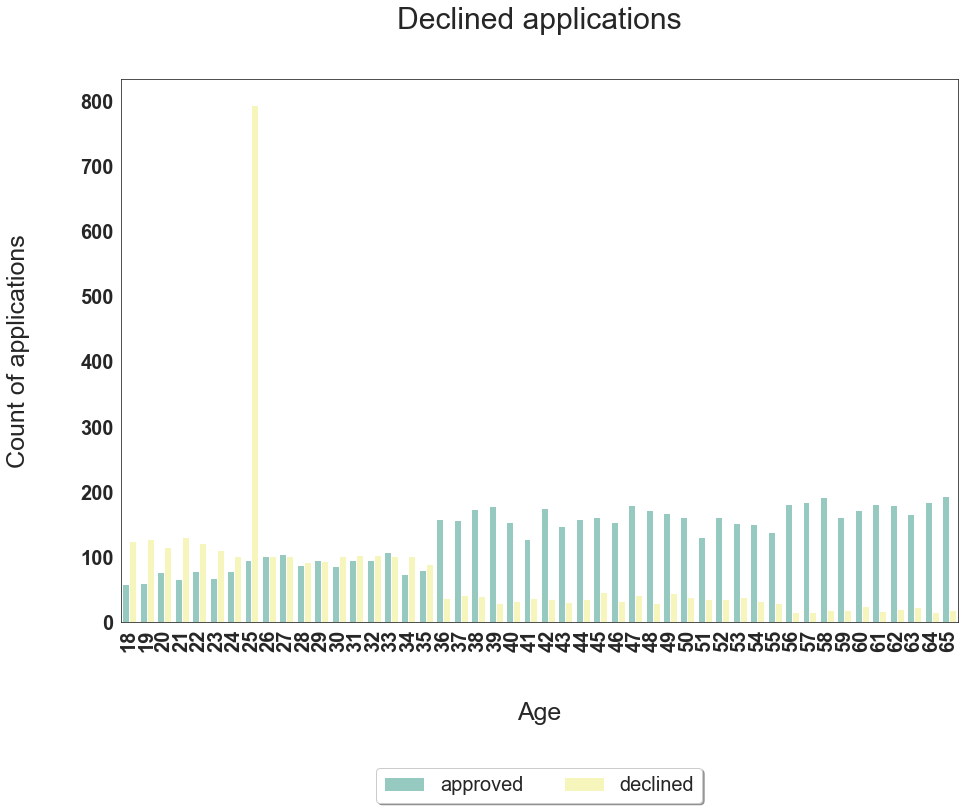

In [58]:
#Plotting the graph
plt.figure(figsize=(15,10))
sns.countplot(
    x='Age',
    hue='Application outcome',
    data=df,
    palette="Set3"
    )

#Customising graph
plt.title("Declined applications", fontsize=30, pad=50)
plt.xlabel("Age", fontsize=25, labelpad=50)
plt.xticks(fontsize=20, rotation = 90, fontweight='bold')
plt.ylabel("Count of applications", fontsize=25, labelpad=50)
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc='center', 
           bbox_to_anchor=(0.5,-0.3), 
           ncol=2, 
           shadow=True, 
           fontsize=20)


#Showing the graph
plt.show()

From the barchart we can see that: 

- The ratio of approved to declined applications increases with age
- There is a huge jump in this ratio between the ages 35 and 36. Why is there such a steep jump? Is this due to internal processes or controls? Are 36 year olds are that much safer than 35 year olds?
- There is a huge spike in applications by 25 year olds which are declined. Why is that so?

Recommendation

- Is Oodle missing out on revenue they could generate from applicants who are just under the age of 36?
- I recommend to review internal processes to check for any age controls and replace strict cut-offs (if any) with a more balanced curve

### Analysing the revenue Oodle can make from their applicants 

I am assuming that Oodle makes revenue from the loan interest they receive and it worth analysing the potential revenue from the applicants.

For this analysis, I have assumed an APR of 0 for applicants that have been declined due to insufficient information. 


In [21]:
#Adding a new column to the dataset calculting the interest potential per Oodle applicant 

df['Interest potential in the 1st year'] = df['Loan amount']* df['APR']
df.head()

,ID,Age,Car type,Loan amount,Deposit,Area,APR,Application outcome,Funded status,Interest potential in the 1st year
0,9997,61,Convertible,24108.0,881.0,rural,0.15,approved,No,3616.20
1,9996,42,Saloon,5988.0,967.0,rural,0.20,approved,No,1197.60
2,9995,57,Saloon,5099.0,973.0,urban,0.15,approved,No,764.85
3,9994,32,Convertible,20774.0,1478.0,rural,0.00,declined,0,0.00
4,9993,29,Saloon,4612.0,774.0,urban,0.00,declined,0,0.00


### Plotting a graph showing Oodle's potential revenue from applicants by area and car type

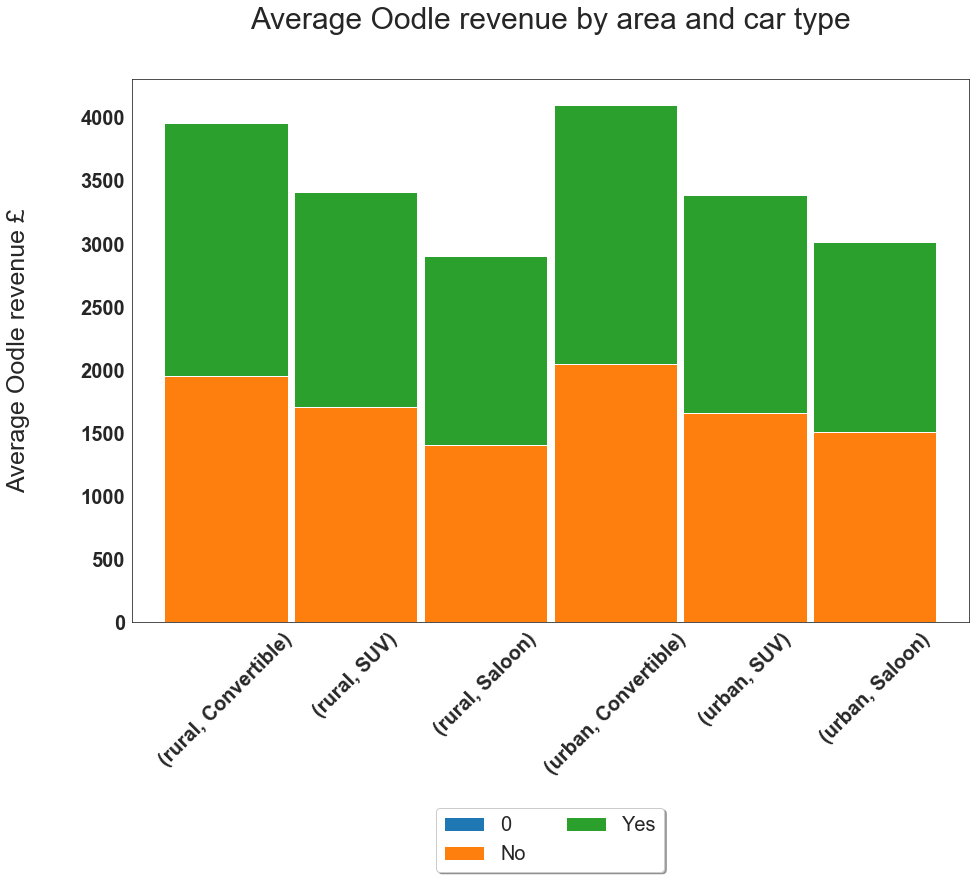

In [44]:
#Plotting the interest revenue in the first year

df.groupby(['Area', 'Car type','Funded status']).mean()['Interest potential in the 1st year'].unstack().plot(  
    figsize=(15,10),  
    kind='bar',
    edgecolor='white',
    width=0.95,
    stacked = True)

#Graph customisation
plt.title("Average Oodle revenue by area and car type", fontsize=30, pad=50)
plt.ylabel("Average Oodle revenue £", fontsize=25, labelpad=50)
plt.xticks(fontsize=20, rotation = 45, fontweight='bold')
plt.xlabel("Areas, car types", fontsize=25, labelpad=50)
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc='center', 
           bbox_to_anchor=(0.5,-0.4), 
           ncol=2, 
           shadow=True, 
           fontsize=20)

plt.show()

By cutting the data by area and car type:

- There is higher average revenue from convertible applicants 
- Convertible applicants in both rural and urban areas have a higher ratio of declined to being approved

Recommendation 

- More money can be made from convertibles. Consider cross-selling approved saloon applicants to convertibles


# Closing analysis

From my analysis, we have learnt that:
1. More rural than urban applicants are being declined 

2. A majority of applicants aged 25 are declined. Applicants aged 36 have a significant higher ratio of being approved than applicants a year younger at 35

3.  Oodle earns more revenue per customer from convertible applicants 

Recommendations
1. Oodle needs to understand why rural applicants are being declined more and funded less than urban applicants. Is it a procedural error? Are rural applicants completing the forms incorrectly or just not completing the process entirely? Are more less credit-worthy rural applicants applying?  Oodle could launch a marketing campaign to target rural applicants that are more likely to pass the process. Oodle can also design campaigns to guide rural applicants through processes and based on Frequently Asked Questions(FAQ).

2. For older applicants, Oodle should consider marketing that targets them to increase applications. For younger applicants, Oodle should review their controls and processes on applicants age. 

3. Oodle should market more convertibles, including through cross-selling or up-selling, to their customers to maximise revenue 

# Further analysis

To take this analysis further:

- I would like to compare this analysis with population/demogaphic data from the Office of National Statistics to determine the percentage of available demographic that can be and currently are Oodle customers 
- Assume an APR rate for applications that have been declined to calculate potential interest from these applicants
